In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


For a uniform distribution on the domain $0\le X \le b$, the pdf is $\frac1b$ for $0\le X \le b$, $0$ otherwise.  This gives  
$E(2\bar{X}) = \int_{0}^{b}2X\frac{1}{b}dx$
$$
E(2\bar{X}) = b
$$
The method of moments estimate of $b$ has the expecation value of $b$, so it is unbaised.

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

The mean of the estimated lambda is 5.350065500329771


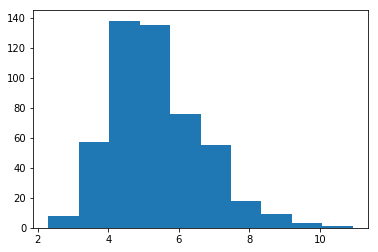

In [21]:
lam=5
lam_est = []
for _ in np.arange(500):
    exp_sample = stats.expon.rvs(scale=1/lam,size=20)
    this_lam_est = 1/np.mean(exp_sample)
    lam_est = np.append(lam_est,this_lam_est)
    
plt.hist(lam_est)
print("The mean of the estimated lambda is",np.mean(lam_est))

The mean of the estimated lambda is 5.257948506732454


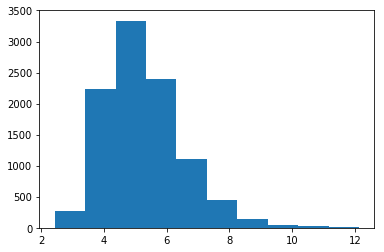

In [22]:
lam=5
lam_est = []
for _ in np.arange(10000):
    exp_sample = stats.expon.rvs(scale=1/lam,size=20)
    this_lam_est = 1/np.mean(exp_sample)
    lam_est = np.append(lam_est,this_lam_est)
    
plt.hist(lam_est)
print("The mean of the estimated lambda is",np.mean(lam_est))

This does not appear to be unbiased.

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

To find the variance of this estimator we find $Var(2X)$.  
$Var(2\bar{X}) = 4Var(\bar{X})$  
$ = 4Var(\frac{X_1+X_2+...+X_n}{n})$  
$ = \frac{4}{n^2}\sum(Var(X_i))$   
$ = \frac{4}{n^2}n\frac{b^2}{12}$  
since there are $n$ $X_i$ each with variance $\frac{b^2}{12}$.  
$$
Var(2X) = \frac{b^2}{3n}
$$

As $n$ increases, this variance decreases, going to zero for large $n$.  Therefore it is a consistent estimator.

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

To find the variance of this estimator we find $Var(\bar{X})$.  
$Var(\bar{X}) = E(\bar{X}^2)-E(\bar{X})^2$
$ = {\sigma^2 \over n} + \mu^2 - \mu^2$  
$$
Var(\bar{X}) = {\sigma^2 \over n}
$$

This approaches 0 for large $n$, so this is a consistent estimator.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

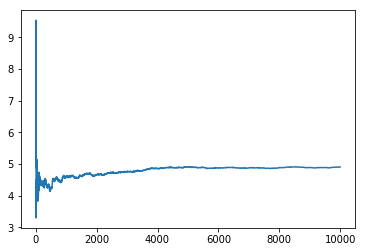

In [20]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()